In [9]:
import networkx as nx # import networkx
import pandas as pd
import matplotlib.pyplot as plt

### Creating retweet network

Social media is, by nature, networked data. Twitter networks manifest in multiple ways. One of the most important types of networks that appear in Twitter are retweet networks. We can represent these as directed graphs, with the retweeting user as the source and the retweeted person as the target. With Twitter data in our flattened DataFrame, we can import these into networkx and create a retweet network.

For this exercise and the rest of this course we'll be using a dataset based on the 2018 State of the Union speech given by Donald Trump. Those tweets have been loaded for you in sotu_retweets.

In [3]:
sotu_retweets = pd.read_csv('../Dataset/sotu2018-rt.csv')

In [4]:
# Create retweet network from edgelist
G_rt = nx.from_pandas_edgelist(
    sotu_retweets,
    source = 'user-screen_name',
    target = 'retweeted_status-user-screen_name',
    create_using = nx.DiGraph())
 
# Print the number of nodes
print('Nodes in RT network:', len(G_rt.nodes()))

# Print the number of edges
print('Edges in RT network:', len(G_rt.edges()))

Nodes in RT network: 2287
Edges in RT network: 2340


### Creating reply network

Reply networks have a markedly different structure to retweet networks. While retweet networks often signal agreement, replies can signal discussion, deliberation, and disagreement. The network properties are the same, however: the network is directed, the source is the replier and the target is the user who is being replied to.

For this exercise we are going to create a reply network from a slightly different sample of State of the Union tweets. Those tweets have been loaded for you in sotu_replies.

In [6]:
sotu_replies = pd.read_csv('../Dataset/sotu2018-reply.csv')

In [7]:
# Create reply network from edgelist
G_reply = nx.from_pandas_edgelist(
    sotu_replies,
    source = 'user-screen_name',
    target = 'in_reply_to_screen_name',
    create_using = nx.DiGraph())
    
# Print the number of nodes
print('Nodes in reply network:', len(G_reply.nodes()))

# Print the number of edges
print('Edges in reply network:', len(G_reply.edges()))

Nodes in reply network: 2622
Edges in reply network: 1904


### Visualizing retweet network

Visualizing retweets networks is an important exploratory data analysis step because it allows us to visually inspect the structure of the network, understand if there is any user that has disproportionate influence, and if there are different spheres of conversation.
We are going to use a layout which runs quicker to see the plot, but the syntax is nearly the same.

networkx has been imported as nx, and the network has been loaded in G_rt for you.

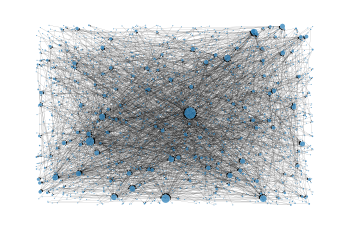

In [10]:
# Create random layout positions
pos = nx.random_layout(G_rt)

# Create size list
sizes = [x[1] for x in G_rt.degree()]

# Draw the network
nx.draw_networkx(G_rt, pos, 
    with_labels = False, 
    node_size = sizes,
    width = 0.1, alpha = 0.7,
    arrowsize = 2, linewidths = 0)

# Turn axis off and show
plt.axis('off'); plt.show()

### In-degree centrality

Centrality is a measure of importance of a node to a network. There are many different types of centrality and each of them has slightly different meaning in Twitter networks. We are first focusing on degree centrality, since its calculation is straightforward and has an intuitive explanation.

For directed networks like Twitter, we need to be careful to distinguish between in-degree and out-degree centrality, especially in retweet networks. In-degree centrality for retweet networks signals users who are getting many retweets.

networkx has been imported as nx. Also, the networks G_rt and G_reply and column_names = ['screen_name', 'degree_centrality'] have been loaded for you.

In [11]:
column_names = ['screen_name', 'degree_centrality']

In [12]:
# Generate in-degree centrality for retweets 
rt_centrality = nx.in_degree_centrality(G_rt)

# Generate in-degree centrality for replies 
reply_centrality = nx.in_degree_centrality(G_reply)

# Store centralities in DataFrame
rt = pd.DataFrame(list(rt_centrality.items()), columns = column_names)
reply = pd.DataFrame(list(reply_centrality.items()), columns = column_names)

# Print first five results in descending order of centrality
print(rt.sort_values('degree_centrality', ascending = False).head())

# Print first five results in descending order of centrality
print(reply.sort_values('degree_centrality', ascending = False).head())

      screen_name  degree_centrality
84        FoxNews           0.055993
38     WhiteHouse           0.031059
1    ScottPresler           0.029746
7      TomiLahren           0.019685
175      HouseGOP           0.017060
         screen_name  degree_centrality
51   realDonaldTrump           0.057230
53             POTUS           0.019458
22           FoxNews           0.013735
6         WhiteHouse           0.011064
416           FLOTUS           0.010301


### Betweenness centrality

Betweenness centrality for retweet and reply networks signals users who bridge between different Twitter communities. These communities may be tied together by topic or ideology.

networkx has been imported as nx. The networks G_rt and G_reply, and column_names = ['screen_name', 'betweenness_centrality'] have been loaded for you.

In [15]:
column_names = ['screen_name', 'betweenness_centrality']

# Generate betweenness centrality for retweets 
rt_centrality = nx.betweenness_centrality(G_rt)

# Generate betweenness centrality for replies 
reply_centrality = nx.betweenness_centrality(G_reply)

# Store centralities in data frames
rt = pd.DataFrame(list(rt_centrality.items()), columns = column_names)
reply = pd.DataFrame(list(reply_centrality.items()), columns = column_names)

# Print first five results in descending order of centrality
print(rt.sort_values('betweenness_centrality', ascending = False).head())

# Print first five results in descending order of centrality
print(reply.sort_values('betweenness_centrality', ascending = False).head())

        screen_name  betweenness_centrality
84          FoxNews                0.000026
29   Public_Citizen                0.000009
206     ChristiChat                0.000005
119      guypbenson                0.000005
362    johncardillo                0.000004
          screen_name  betweenness_centrality
288      ScottPresler            1.019365e-06
319   HRCNJVolunteers            2.912471e-07
1109             RRN3            2.912471e-07
1697    thebestcloser            2.912471e-07
1844   BrandonTXNeely            1.456236e-07


### Ratios

While not strictly a measure of importance to a network, the idea of being "ratio'd" is a network measure which is particular to Twitter and is typically used to judge the unpopularity of a tweet. "The Ratio," as it is called, is calculated by taking the number of replies and dividing it by the number of retweets. For our purposes, it makes conceptual sense to take only the in-degrees of both the retweet and reply networks.

The networks G_rt and G_reply, and column_names = ['screen_name', 'degree'] have been loaded for you.

In [16]:
column_names = ['screen_name','degree']